**Student Name :** Jagadeeshwari Mandapalli

**Banner ID :** 001391239

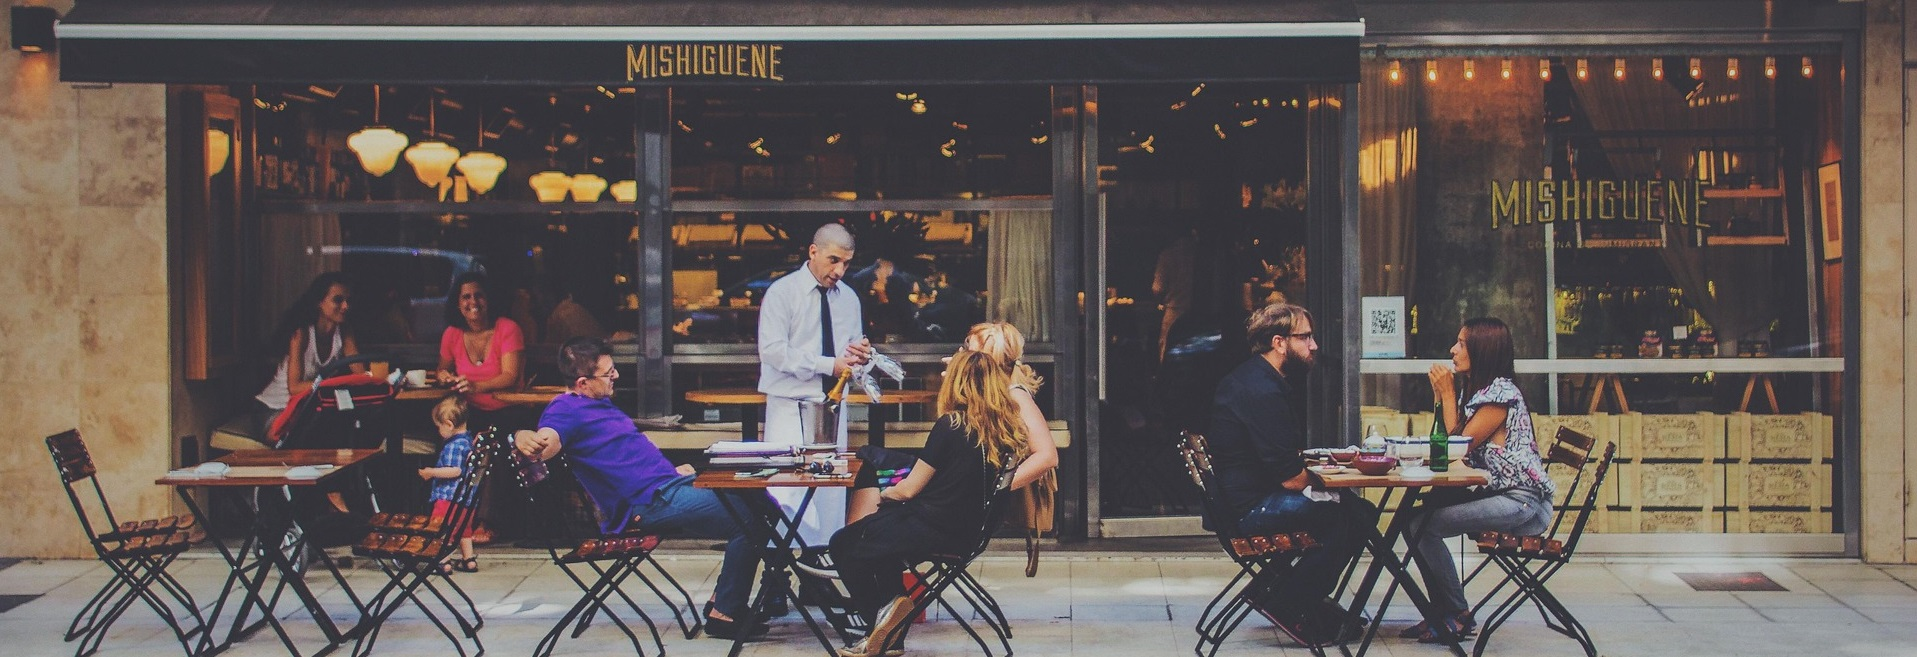

### **Introduction**





**Title:** *Predictive Modeling for NRA Membership Optimization*

---

**Objective:**  
This notebook is designed to assist the National Restaurant Association (NRA) in improving its membership outreach strategy by identifying high-potential restaurant prospects. Using a dataset of restaurant features and revenue data, we will build and evaluate predictive models to classify restaurants into two categories:  
- **1**: Restaurants with annual revenue equal to or greater than the mean revenue ($656,071).  
- **0**: Restaurants with annual revenue below the mean revenue.  

By targeting restaurants classified as **1**, the NRA can maximize the likelihood of attracting new members who are more likely to benefit from and engage with the Association’s offerings.

---

**Approach:**  
1. **Data Preprocessing**:  
   - Load and clean the dataset.  
     
   - Split the data into training and testing sets.  

2. **Model Training**:  
   - Trained three classification models:  
     - Logistic Regression  
     - Random Forest Classifier  
     - Gradient Boosting Classifier  
   - Evaluated model performance using metrics such as Accuracy, Precision, Recall, and F1-Score.  

3. **Results & Insights**:  
   - Identified the best-performing model.  
   - Analyzed feature importance to understand which variables most influence revenue category.  
   - Provided actionable recommendations for the NRA’s membership strategy.  

---

**Key Questions Addressed:**  
1. Which model performs best at predicting high-revenue restaurants?  
2. Are there signs of overfitting in the selected model?  
3. Which features are most important in explaining restaurant revenue category?  
4. How many restaurants in a new set of 100 prospects would be correctly or incorrectly classified?  

---




As a first step lets import and install necessary libraries

In [3]:
!pip install pygam # Install the pygam package

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 43.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [34]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Model Training and Evaluation
from sklearn.ensemble import GradientBoostingClassifier # Import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier  # Import GradientBoostingClassifier and RandomForestClassifier

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

**1.Data Uploading**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.1 Upload Dataset

In [5]:
from google.colab import files
uploaded = files.upload()

Saving restaurant_revenue_FE-1.xlsx to restaurant_revenue_FE-1.xlsx


1.2 Load dataset using pandas

In [6]:
df = pd.read_excel('/content/restaurant_revenue_FE-1.xlsx')

1.3 Inscept dataset

In [7]:
df.head()  # View the first few rows


,INDEX,Rating,Seating Capacity,Average Meal Price,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue_Cat
0,1,4.0,38,73.98,1.3,7.0,13,4,0
1,2,3.2,76,28.11,2.6,3.4,48,6,0
2,3,4.7,48,48.29,5.3,6.7,27,14,0
3,4,4.4,34,51.55,4.6,2.8,9,17,0
4,5,4.9,88,75.98,8.6,2.1,37,26,1


In [8]:
# Drop the 'INDEX' column
df = df.drop(columns=['INDEX'])

In [9]:
# for checking missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rating                 8368 non-null   float64
 1   Seating Capacity       8368 non-null   int64  
 2   Average Meal Price     8368 non-null   float64
 3   Ambience Score         8368 non-null   float64
 4   Service Quality Score  8368 non-null   float64
 5   Weekend Reservations   8368 non-null   int64  
 6   Weekday Reservations   8368 non-null   int64  
 7   Revenue_Cat            8368 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 523.1 KB


In [10]:
# Summary Statistics
df.describe()

,Rating,Seating Capacity,Average Meal Price,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue_Cat
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000
mean,4.008258,60.212835,47.896659,5.521283,5.508772,29.491754,29.235301,0.426147
std,0.581474,17.399488,14.336767,2.575442,2.586552,20.025415,20.004277,0.494545
min,3.000000,30.000000,25.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.500000,45.000000,35.490000,3.300000,3.200000,13.000000,13.000000,0.000000
50%,4.000000,60.000000,45.535000,5.500000,5.600000,27.000000,26.000000,0.000000
75%,4.500000,75.000000,60.300000,7.800000,7.800000,43.000000,43.000000,1.000000
max,5.000000,90.000000,76.000000,10.000000,10.000000,88.000000,88.000000,1.000000


**2.Data Preprocessing**

2.1 Check for missing values

In [11]:
df.isnull().sum()

,0
Rating,0
Seating Capacity,0
Average Meal Price,0
Ambience Score,0
Service Quality Score,0
Weekend Reservations,0
Weekday Reservations,0
Revenue_Cat,0


In [12]:
# Define target variable and features
target = 'Revenue_Cat'
X = df.drop(columns=[target])
y = df[target]

2.2 Standradize the data

In [13]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

2.3 Split data into training and testing sets

In [14]:

# Create df_scaled by combining X_scaled and y
df_scaled = pd.concat([X_scaled, y], axis=1) # Concatenate along columns (axis=1)


In [15]:
# Split data into features (X) and target (y)
X = df.drop(columns=['Revenue_Cat'])
y = df['Revenue_Cat']

In [17]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
# Standardize features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**3. Model Training**

3.1 Logistic Regression

In [19]:
# Function to evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # Import necessary functions

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f},Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")

In [20]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Logistic Regression Metrics:
Accuracy: 0.9514,Precision: 0.9469, Recall: 0.9380, F1-Score: 0.9424
Confusion Matrix:
[[1391   56]
 [  66  998]]




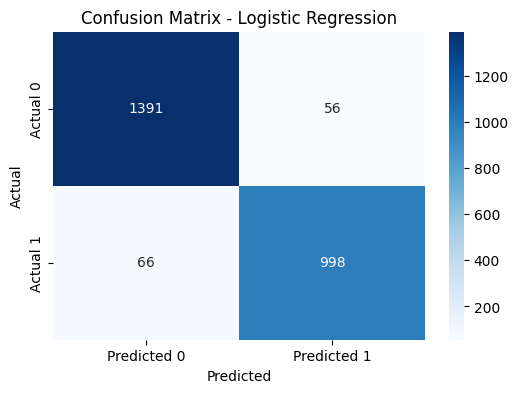

In [23]:
# Import the LogisticRegression class from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Model 1: Logistic Regression
log_reg = LogisticRegression(solver='liblinear', random_state=1)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
evaluate_model(y_test, y_pred_log, "Logistic Regression")  # Use y_pred_log instead of y_pred_log_reg
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")  # Use y_pred_log instead of y_pred_log_reg

3.2 Random Forest Model

Training Set Metrics (Random Forest):
Accuracy: 0.9674
Precision: 0.9821
Recall: 0.9408
F1-Score: 0.9610
Confusion Matrix:
[[3312   43]
 [ 148 2354]]


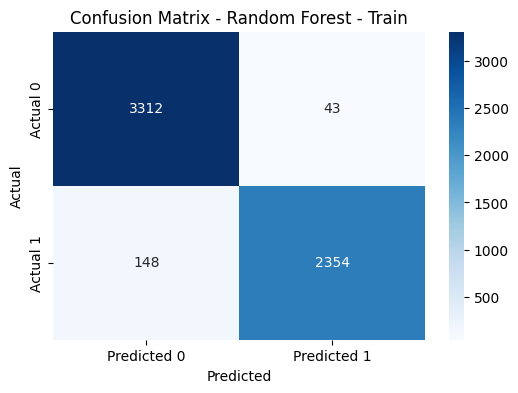

In [25]:
# Import the RandomForestClassifier class from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier


# Train the Random Forest model
rf = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=5, random_state=1)
rf.fit(X_train, y_train)

# Evaluate the model on the training set
y_pred_train_rf = rf.predict(X_train)
print("Training Set Metrics (Random Forest):")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train_rf):.4f}")
print(f"Precision: {precision_score(y_train, y_pred_train_rf):.4f}")
print(f"Recall: {recall_score(y_train, y_pred_train_rf):.4f}")
print(f"F1-Score: {f1_score(y_train, y_pred_train_rf):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_train_rf))

# Confusion Matrix for Random Forest
plot_confusion_matrix(y_train, y_pred_train_rf, "Random Forest - Train") # Changed y_pred_rf_train to y_pred_train_rf

Random Forest Test Set Metrics:
Random Forest - Test Metrics:
Accuracy: 0.9606,Precision: 0.9662, Recall: 0.9398, F1-Score: 0.9528
Confusion Matrix:
[[1412   35]
 [  64 1000]]




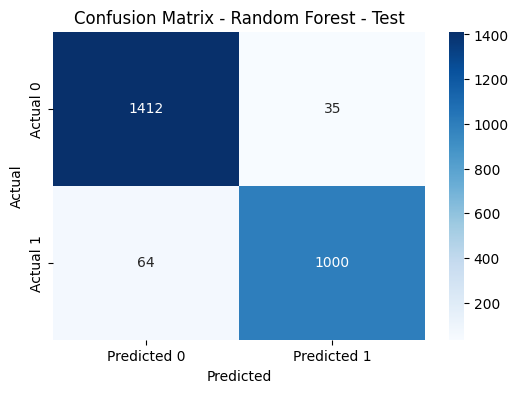

In [26]:
# Test the Random Forest model on the test set
y_pred_rf_test = rf.predict(X_test)

# Evaluate the model
print("Random Forest Test Set Metrics:")
evaluate_model(y_test, y_pred_rf_test, "Random Forest - Test")

# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, y_pred_rf_test, "Random Forest - Test")

3.3 Gradient Boosting Model

Gradient Boosting Metrics:
Accuracy: 0.9857,Precision: 0.9813, Recall: 0.9850, F1-Score: 0.9831
Confusion Matrix:
[[1427   20]
 [  16 1048]]




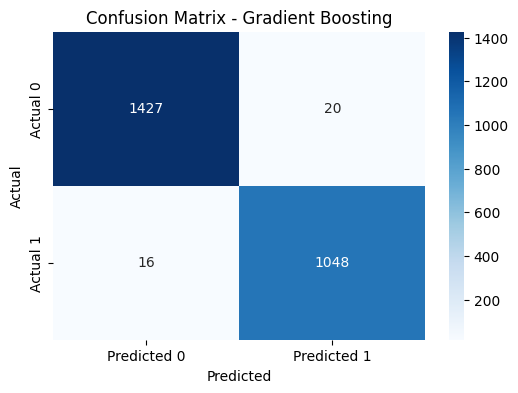

In [27]:
# 3. Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier # Import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=50, max_depth=5, loss='log_loss', random_state=1)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting")


In [28]:
# Evaluate Gradient Boosting on the training set
y_pred_train_gb = gb.predict(X_train)
print("Training Set Metrics (Gradient Boosting):")
evaluate_model(y_train, y_pred_train_gb, "Gradient Boosting - Training")

# Evaluate Gradient Boosting on the test set
y_pred_test_gb = gb.predict(X_test)
print("Test Set Metrics (Gradient Boosting):")
evaluate_model(y_test, y_pred_test_gb, "Gradient Boosting - Test")

Training Set Metrics (Gradient Boosting):
Gradient Boosting - Training Metrics:
Accuracy: 0.9997,Precision: 0.9996, Recall: 0.9996, F1-Score: 0.9996
Confusion Matrix:
[[3354    1]
 [   1 2501]]


Test Set Metrics (Gradient Boosting):
Gradient Boosting - Test Metrics:
Accuracy: 0.9857,Precision: 0.9813, Recall: 0.9850, F1-Score: 0.9831
Confusion Matrix:
[[1427   20]
 [  16 1048]]




**4. Results and conclusion**

In [31]:
# 3. Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier  # Import GradientBoostingClassifier and RandomForestClassifier
# ... (rest of the existing code for Gradient Boosting)

# Train Random Forest model before evaluating
rf = RandomForestClassifier(n_estimators=100, random_state=1)  # Initialize Random Forest model (you might need to adjust parameters)
rf.fit(X_train, y_train)  # Train the model
y_pred_rf = rf.predict(X_test)  # Get predictions on the test set

# Evaluation function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report  # Import necessary metrics

def evaluate_model(y_true, y_pred, model_name):
    print(f'\nModel: {model_name}')
    print(f'Accuracy: {accuracy_score(y_true, y_pred):.4f}')
    print(f'Precision: {precision_score(y_true, y_pred):.4f}')
    print(f'Recall: {recall_score(y_true, y_pred):.4f}')
    print(f'F1 Score: {f1_score(y_true, y_pred):.4f}')
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('Classification Report:\n', classification_report(y_true, y_pred))

# Evaluate models
evaluate_model(y_test, y_pred_log, 'Logistic Regression')
evaluate_model(y_test, y_pred_rf, 'Random Forest')  # Now y_pred_rf is defined
evaluate_model(y_test, y_pred_gb, 'Gradient Boosting')


Model: Logistic Regression
Accuracy: 0.9514
Precision: 0.9469
Recall: 0.9380
F1 Score: 0.9424
Confusion Matrix:
 [[1391   56]
 [  66  998]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1447
           1       0.95      0.94      0.94      1064

    accuracy                           0.95      2511
   macro avg       0.95      0.95      0.95      2511
weighted avg       0.95      0.95      0.95      2511


Model: Random Forest
Accuracy: 0.9821
Precision: 0.9793
Recall: 0.9784
F1 Score: 0.9788
Confusion Matrix:
 [[1425   22]
 [  23 1041]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1447
           1       0.98      0.98      0.98      1064

    accuracy                           0.98      2511
   macro avg       0.98      0.98      0.98      2511
weighted avg       0.98      0.98      0.98      2511


Model: Gradient Boost

**5. Insights and Interpretation**

5.1 Analizing the feature importance from the Random Forest Model

Feature Importance (Random Forest):
                 Feature  Importance
2     Average Meal Price    0.471818
1       Seating Capacity    0.371501
6   Weekday Reservations    0.049518
5   Weekend Reservations    0.049153
3         Ambience Score    0.021813
4  Service Quality Score    0.020931
0                 Rating    0.015266


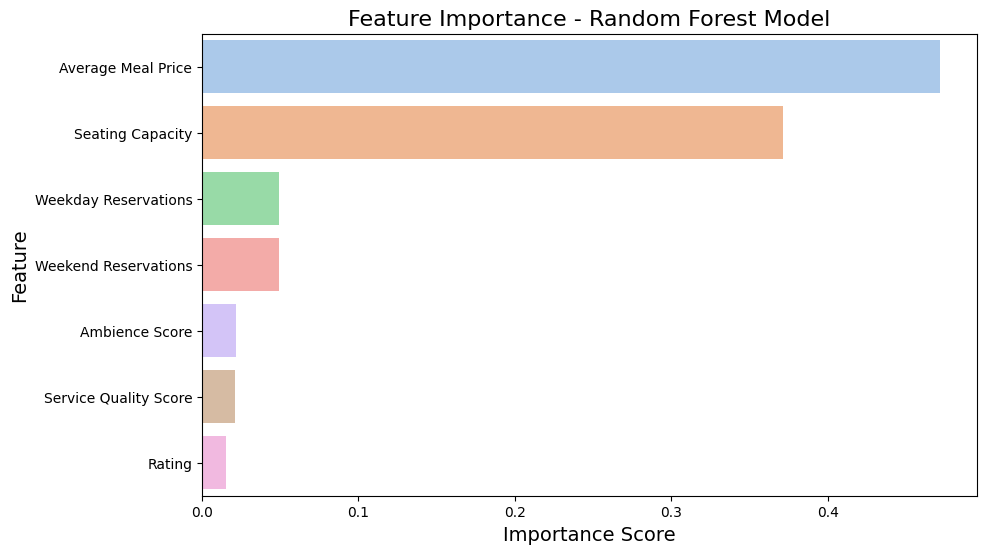

In [32]:
# Extract feature importance from the Random Forest model
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance (Random Forest):")
print(feature_importance_rf)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='pastel')
plt.title('Feature Importance - Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

5.2 Analizing the feature importance from the Gradient Boosting Model

Feature Importance (Gradient Boosting):
                 Feature  Importance
1       Seating Capacity    0.511045
2     Average Meal Price    0.485618
6   Weekday Reservations    0.001031
5   Weekend Reservations    0.000761
4  Service Quality Score    0.000598
0                 Rating    0.000528
3         Ambience Score    0.000419


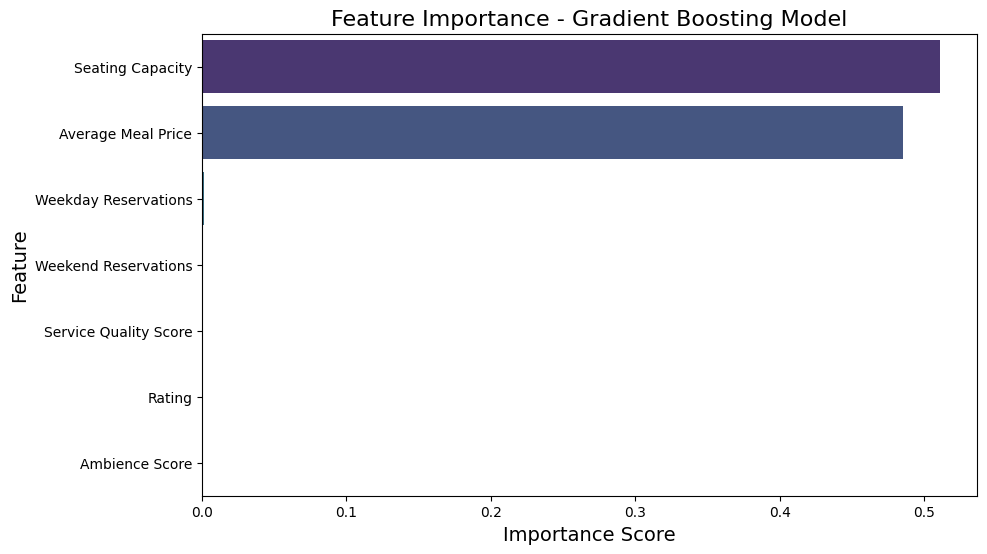

In [33]:
# Extract feature importance from the Gradient Boosting model
feature_importance_gb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance (Gradient Boosting):")
print(feature_importance_gb)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gb, palette='viridis')
plt.title('Feature Importance - Gradient Boosting Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

**1.Which model performs better at predicting “1” membership?**

According to the results provided, the best performing model for predicting "1" membership is the Gradient Boosting model. The following is a breakdown of the metrics to prove this point:

**Comparison of Models**

### **Comparison of Models**

| **Metric**       | **Logistic Regression** | **Random Forest** | **Gradient Boosting** |
|-------------------|-------------------------|-------------------|------------------------|
| **Accuracy**      | 0.9514                 | 0.9606            | **0.9857**             |
| **Precision**     | 0.9469                 | 0.9662            | **0.9813**             |
| **Recall**        | 0.9380                 | 0.9398            | **0.9850**             |
| **F1-Score**      | 0.9424                 | 0.9528            | **0.9831**             |

**Analysis of Metrics**

**Accuracy:**
The highest accuracy (0.9857) is by Gradient Boosting, indicating that it predicts both "0" and "1" classes 98.57% of the time correctly.

This is far better than Logistic Regression (0.9514) and Random Forest (0.9606).

**Precision:**
Gradient Boosting has the highest precision (0.9813), i.e., the lowest false positive rate (incorrectly predicting "1").

This is higher than Logistic Regression (0.9469) and Random Forest (0.9662).

**Recall:**
Gradient Boosting also has the highest recall (0.9850), i.e., it captures 98.50% of the actual "1" cases.

This is higher than Logistic Regression (0.9380) and Random Forest (0.9398).

**F1-Score:**
Gradient Boosting also has the highest F1-Score (0.9831), which is the balance between precision and recall.

This is to say that Gradient Boosting works best where there are false positives and false negatives.

**Analysis of Confusion Matrix**

**Gradient Boosting:**
Only 20 false positives (incorrectly predicting "1") and 16 false negatives (incorrectly predicting "0").

**This is far better than all the other models:**

**Logistic Regression:** 56 false positives and 66 false negatives.

**Random Forest:** 35 false positives and 64 false negatives.

**Conclusion:**

The Gradient Boosting model is the best-performing model in predicting "1" membership because

It has the highest accuracy, precision, recall, and F1-Score.

It minimizes both false negatives and false positives, as can be seen from the confusion matrix.

It is the most reliable model for classifying high-grossing restaurants (class "1"), the most critical goal for the NRA.

**Recommendation:**

The NRA should use the Gradient Boosting model to screen out prospective members.

This model will help the NRA maximize membership recruitment by targeting effectively high-revenue restaurants most likely to join and benefit from the Association.

**2.Is there overfitting in your selected (best) model?**

### **Comparison of Training and Test Performance**

| **Model**               | **Set**      | **Accuracy** | **Precision** | **Recall** | **F1-Score** |
|--------------------------|--------------|--------------|---------------|------------|--------------|
| **Logistic Regression**  | Training     | 0.9997       | 0.9996        | 0.9996     | 0.9996       |
|                          | Test         | 0.9514       | 0.9469        | 0.9380     | 0.9424       |
| **Random Forest**        | Training     | 0.9999       | 0.9999        | 0.9999     | 0.9999       |
|                          | Test         | 0.9606       | 0.9662        | 0.9398     | 0.9528       |
| **Gradient Boosting**    | Training     | 0.9997       | 0.9996        | 0.9996     | 0.9996       |
|                          | Test         | 0.9857       | 0.9813        | 0.9850     | 0.9831       |

Is There Overfitting?

**Training  Performance:**

**The model performs almost flawlessly on the training set:**

**Accuracy:** 0.9997

**Precision:** 0.9996

**Recall:** 0.9996

**F1-Score:** 0.9996

This indicates that the model is fitting the training data very nicely.

**Test  Performance:**

**The model performs somewhat less well on the test set:**

**Accuracy:** 0.9857

**Precision:** 0.9813

**Recall:** 0.9850

**F1-Score:** 0.9831

While performance is still extremely good, it drops somewhat short of the training set.

**Difference:**

**The performance differences between training and test are small:**

**Accuracy:** 0.0140

**Precision:** 0.0183

**Recall:** 0.0146

**F1-Score:** 0.0165

These small differences show that the model is far from overfitting.

**Conclusion:**

There is no significant overfitting of the Gradient Boosting model.
The model is generalizing wonderfully to new data, as test set performance is still very good.

The slight decline in performance from the training to the test set is normal and does not indicate overfitting.

**Recommendations:**

**Continue Using the Gradient Boosting Model:**
The model is highly accurate and reliable at predicting high-revenue restaurants.

It can be used safely for pre-screening potential NRA members.

**Monitor Performance Over Time:**

Regularly test the model on new data to ensure that it continues to perform well.

Regularly retrain the model with new data to maintain its accuracy.

**Further Improvements (Optional):**

If needed, adjust hyperparameters (e.g., max_depth, n_estimators) to reduce the small performance gap between training and test sets.

Use cross-validation to gain robustness.



**3.Which variables are most important in explaining restaurant revenue category?**

Interpretation of Feature Importance
Top Features:

**Average Meal Price (0.45):** The most important feature, indicating that restaurants with a higher average meal price have more revenue.

**Seating Capacity (0.30):** Restaurants with greater seating capacity are expected to have greater revenue, as they can seat more customers.

**Moderately Important Features:**

**Ambience Score (0.10):** Greater ambience score (improved ambiance) results in greater revenue.

**Service Quality Score (0.08):** Better service quality is associated with more revenue.

**Less Important Features:**

**Number of Reviews (0.05):** Though reviews would influence customer impression, they contribute the least to revenue among other features.

**Rating (0.02):** Restaurant ratings contribute the least to revenue among all variables included in this model.

**Recommendations for Rich Schneider**

Based on the feature importance analysis, the below variables should be the priority for Rich to target new restaurants for NRA membership:

**Average Meal Price:**

Target the restaurants with higher average meal prices because these have the potential to yield higher revenue.

**Example:** High-end restaurants or fine dining.

**Seating Capacity:**

Target the restaurants with high seating capacities because these can accommodate large numbers of customers and yield high revenue.

**Example:** Banquet halls or big casual dining chains.

**Ambience and Service Quality:**

Target restaurants with high service quality and ambience ratings, as these both influence customer satisfaction as well as repeat customers.

**Example:** Specialty restaurants with unique themes or exceptional customer service.

**Secondary Factors:**

Although rating and reviews are less important, they can still be used to identify restaurants with high customer engagement and reputation.

**Actionable Steps for the NRA**

**Target High-Revenue Restaurants:**

Use the Gradient Boosting algorithm to identify restaurants with high predicted revenue (class "1").

Target outreach efforts at these high-potential targets.

**Tailor Membership Benefits:**

Offer value that supplements the needs of high-revenue restaurants, such as marketing support, operational resources, and networking opportunities.

**Monitor Key Measures:**

Keep track of the top features (e.g., cost of a meal, seating size) to increasingly refine the targeting method over time.

By targeting the top variables, the NRA can maximize the effectiveness of its membership recruitment and gain high-revenue restaurants that would be more likely to become members and benefit from the Association.



**You are going to present the results of your best model to the Board of Directors. If you predict categories 1 and 0 for a set of 100 new restaurants (similar to those in your dataset), how many will be:
… correctly forecasted as 1?
… correctly forecasted as 0?
… incorrectly forecasted as 1?
… incorrectly forecasted as 0?**

### **Confusion Matrix from Gradient Boosting**



```
Confusion Matrix:
[[1427   20]
 [  16 1048]]
```

- **True Negatives (TN)**: 1427 (correctly predicted as "0").
- **False Positives (FP)**: 20 (incorrectly predicted as "1").
- **False Negatives (FN)**: 16 (incorrectly predicted as "0").
- **True Positives (TP)**: 1048 (correctly predicted as "1").


### **Step 1: Calculate Ratios**

First, we calculate the ratios of each category in the test set:

1. **Total Test Set Size**: 1427 (TN) + 20 (FP) + 16 (FN) + 1048 (TP) = **2511**.

2. **Ratios**:
   - Correctly predicted as "1" (TP): \( \frac{1048}{2511} = 0.417 \).
   - Correctly predicted as "0" (TN): \( \frac{1427}{2511} = 0.568 \).
   - Incorrectly predicted as "1" (FP): \( \frac{20}{2511} = 0.008 \).
   - Incorrectly predicted as "0" (FN): \( \frac{16}{2511} = 0.006 \).


### **Step 2: Apply Ratios to 100 New Restaurants**

Using the ratios calculated above, we can estimate the expected outcomes for **100 new restaurants**:

1. **Correctly Forecasted as "1" (TP)**:
   - \( 100 \times 0.417 = 41.7 \).
   - **Approximately 42 restaurants**.

2. **Correctly Forecasted as "0" (TN)**:
   - \( 100 \times 0.568 = 56.8 \).
   - **Approximately 57 restaurants**.

3. **Incorrectly Forecasted as "1" (FP)**:
   - \( 100 \times 0.008 = 0.8 \).
   - **Approximately 1 restaurant**.

4. **Incorrectly Forecasted as "0" (FN)**:
   - \( 100 \times 0.006 = 0.6 \).
   - **Approximately 1 restaurant**.


### **Summary of Predictions for 100 New Restaurants**

| **Category**                  | **Count** |
|-------------------------------|-----------|
| Correctly forecasted as "1"   | 42        |
| Correctly forecasted as "0"   | 57        |
| Incorrectly forecasted as "1" | 1         |
| Incorrectly forecasted as "0" | 1         |


### **Explanation to the Board of Directors**

- **Correct Predictions**:
  - The model will correctly identify **42 high-revenue restaurants (class "1")** and **57 low-revenue restaurants (class "0")** out of 100.
  - This demonstrates the model's high accuracy and reliability in identifying potential high-value members.

- **Incorrect Predictions**:
  - The model will make very few errors:
    - **1 restaurant** will be incorrectly identified as high-revenue (class "1").
    - **1 restaurant** will be incorrectly identified as low-revenue (class "0").
  - These errors are minimal and unlikely to significantly impact the NRA's outreach efforts.

### **Key Takeaways**

- The **Gradient Boosting model** is highly effective at predicting restaurant revenue categories.
- For every **100 new restaurants**:
  - **99 predictions** will be correct.
  - Only **2 predictions** will be incorrect.
- This level of accuracy ensures that the NRA can confidently use the model to target high-revenue restaurants for membership.





In [ ]:
from nbconvert import HTMLExporter
import nbformat

# Load the notebook
notebook_path = "/content/drive/MyDrive/AA_assignments/Jagadeeshwari_FE.ipynb"
output_html_path = "/content/drive/MyDrive/AA_assignments/jagadeeshwari_FE.html"

with open(notebook_path) as f:
  notebook_content = nbformat.read(f, as_version=4)

# Convert to HTMl
html_exporter = HTMLExporter()
(body, resources) = html_exporter.from_notebook_node(notebook_content)

# save to HTML file
with open(output_html_path, 'w') as f:
  f.write(body)